In [7]:
from google.colab import files
uploaded = files.upload()  # manually upload `aggTrade.zip` and `depth20_1000ms.zip`


Saving depth20_1000ms-20250410T193305Z-001.zip to depth20_1000ms-20250410T193305Z-001.zip
Saving aggTrade-20250410T193314Z-001.zip to aggTrade-20250410T193314Z-001.zip


In [8]:
import zipfile
import os

# Extract aggTrade.zip
with zipfile.ZipFile("aggTrade-20250410T193314Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("aggTrade")

# Extract depth20_1000ms.zip
with zipfile.ZipFile("depth20_1000ms-20250410T193305Z-001.zip", 'r') as zip_ref:
    zip_ref.extractall("depth20_1000ms")


In [12]:
def debug_aggtrade_file(folder_path):
    for fname in os.listdir(folder_path):
        if fname.endswith('.txt'):
            with open(os.path.join(folder_path, fname), 'r') as f:
                for i, line in enumerate(f):
                    print("Raw line from file:\n", line)
                    return  # Just show one line


In [13]:
debug_aggtrade_file("aggTrade")


In [15]:
import os

for root, dirs, files in os.walk("aggTrade"):
    print("Directory:", root)
    for f in files:
        print(" -", f)


Directory: aggTrade
Directory: aggTrade/aggTrade
 - BNBFDUSD_20250315.txt
 - BNBFDUSD_20250317.txt
 - BNBFDUSD_20250314.txt
 - BNBFDUSD_20250316.txt


In [19]:
def parse_aggtrade_folder(folder_path):
    all_trades = []
    for fname in os.listdir(folder_path):
        if fname.endswith('.txt'):
            with open(os.path.join(folder_path, fname), 'r') as f:
                for line in f:
                    try:
                        trade = json.loads(line)
                        all_trades.append(trade)
                    except:
                        continue
    # Check if all_trades is empty before accessing elements
    if all_trades:
        print("First parsed trade:\n", all_trades[0])  # 👈 print a sample
    else:
        print("No trades found in the folder.")
    return pd.DataFrame(all_trades)

aggtrade_df = parse_aggtrade_folder("aggTrade/aggTrade")

No trades found in the folder.


In [20]:
with open("aggTrade/aggTrade/BNBFDUSD_20250315.txt", 'r') as f:
    for i, line in enumerate(f):
        print(f"Line {i+1}:", line)
        if i == 4:  # just show first 5 lines
            break


Line 1: Time,Price,Quantity,IsMarketMaker,NumTrades,M

Line 2: 2025-03-15 00:00:02.520151164 +0530 IST,585.71000000,1.07300000,true,1,true

Line 3: 2025-03-15 00:00:02.593226271 +0530 IST,585.71000000,1.07300000,true,1,true

Line 4: 2025-03-15 00:00:02.695146961 +0530 IST,585.71000000,0.39800000,true,1,true

Line 5: 2025-03-15 00:00:02.849171224 +0530 IST,585.66000000,0.41000000,true,1,true



In [23]:
with open("depth20_1000ms/depth20_1000ms/BNBFDUSD_20250315.txt", 'r') as f:
    for i, line in enumerate(f):
        print(f"Line {i+1}:", line)
        if i == 4:
            break


Line 1: Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,BidQtyL16,BidPriceL15,BidQtyL15,BidPriceL14,BidQtyL14,BidPriceL13,BidQtyL13,BidPriceL12,BidQtyL12,BidPriceL11,BidQtyL11,BidPriceL10,BidQtyL10,BidPriceL9,BidQtyL9,BidPriceL8,BidQtyL8,BidPriceL7,BidQtyL7,BidPriceL6,BidQtyL6,BidPriceL5,BidQtyL5,BidPriceL4,BidQtyL4,BidPriceL3,BidQtyL3,BidPriceL2,BidQtyL2,BidPriceL1,BidQtyL1,AskPriceL1,AskQtyL1,AskPriceL2,AskQtyL2,AskPriceL3,AskQtyL3,AskPriceL4,AskQtyL4,AskPriceL5,AskQtyL5,AskPriceL6,AskQtyL6,AskPriceL7,AskQtyL7,AskPriceL8,AskQtyL8,AskPriceL9,AskQtyL9,AskPriceL10,AskQtyL10,AskPriceL11,AskQtyL11,AskPriceL12,AskQtyL12,AskPriceL13,AskQtyL13,AskPriceL14,AskQtyL14,AskPriceL15,AskQtyL15,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20

Line 2: 2025-03-15 00:00:03.292062886 +0530 IST,585.44000000,0.01500000,585.45000000,0.90600000,585.46000000,0.57000000,585.47000000,0.0710000

In [26]:
def parse_depth_folder_csv(folder_path):
    all_depths = []
    for fname in os.listdir(folder_path):
        if fname.endswith('.txt'):
            full_path = os.path.join(folder_path, fname)
            df = pd.read_csv(full_path)

            # Strip timezone name (keep up to "+0530")
            df['Time'] = df['Time'].str.replace(r' \+0530 IST', '', regex=True)

            # Parse timestamp manually
            df['timestamp'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S.%f')

            all_depths.append(df)

    result = pd.concat(all_depths)
    return result.set_index('timestamp').sort_index()


In [27]:
depth_df = parse_depth_folder_csv("depth20_1000ms/depth20_1000ms")
depth_df.head()


,Time,BidPriceL20,BidQtyL20,BidPriceL19,BidQtyL19,BidPriceL18,BidQtyL18,BidPriceL17,BidQtyL17,BidPriceL16,...,AskPriceL16,AskQtyL16,AskPriceL17,AskQtyL17,AskPriceL18,AskQtyL18,AskPriceL19,AskQtyL19,AskPriceL20,AskQtyL20
timestamp,,,,,,,,,,,,,,,,,,,,,
2025-03-14 00:00:02.292522546,2025-03-14 00:00:02.292522546,579.20,0.621,579.24,0.015,579.25,0.009,579.26,0.013,579.27,...,579.67,1.151,579.68,0.043,579.69,1.258,579.70,0.911,579.71,2.025
2025-03-14 00:00:03.292828523,2025-03-14 00:00:03.292828523,579.08,2.612,579.09,8.606,579.10,3.453,579.11,3.825,579.12,...,579.59,0.971,579.60,5.071,579.61,4.894,579.62,1.017,579.63,0.048
2025-03-14 00:00:04.292889586,2025-03-14 00:00:04.292889586,579.14,1.948,579.15,3.957,579.18,1.681,579.19,3.465,579.20,...,579.62,1.017,579.63,0.048,579.64,9.720,579.65,2.025,579.66,0.365
2025-03-14 00:00:05.292551566,2025-03-14 00:00:05.292551566,579.07,0.013,579.08,0.013,579.09,8.606,579.10,3.453,579.11,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,7.213
2025-03-14 00:00:06.292725093,2025-03-14 00:00:06.292725093,579.11,9.143,579.12,6.361,579.13,5.837,579.14,2.816,579.15,...,579.56,0.024,579.57,1.926,579.58,2.127,579.59,0.279,579.60,10.469


In [28]:
def parse_aggtrade_folder_csv(folder_path):
    all_trades = []
    for fname in os.listdir(folder_path):
        if fname.endswith('.txt'):
            full_path = os.path.join(folder_path, fname)
            df = pd.read_csv(full_path)

            # Strip timezone name
            df['Time'] = df['Time'].str.replace(r' \+0530 IST', '', regex=True)

            # Parse manually
            df['timestamp'] = pd.to_datetime(df['Time'], format='%Y-%m-%d %H:%M:%S.%f')

            all_trades.append(df)

    result = pd.concat(all_trades)
    return result.set_index('timestamp').sort_index()


In [29]:
aggtrade_df = parse_aggtrade_folder_csv("aggTrade/aggTrade")
aggtrade_df.head()


,Time,Price,Quantity,IsMarketMaker,NumTrades,M
timestamp,,,,,,
2025-03-14 00:00:02.764823793,2025-03-14 00:00:02.764823793,579.41,0.496,True,1,True
2025-03-14 00:00:02.781509697,2025-03-14 00:00:02.781509697,579.38,0.013,True,1,True
2025-03-14 00:00:02.805731800,2025-03-14 00:00:02.8057318,579.38,0.104,True,1,True
2025-03-14 00:00:03.902576812,2025-03-14 00:00:03.902576812,579.34,0.496,True,1,True
2025-03-14 00:00:03.905083833,2025-03-14 00:00:03.905083833,579.32,2.739,True,2,True


In [30]:
features = pd.DataFrame(index=depth_df.index)

# Spread (Level 1)
features['spread'] = depth_df['AskPriceL1'] - depth_df['BidPriceL1']

# Microprice
features['microprice'] = (
    depth_df['BidPriceL1'] * depth_df['AskQtyL1'] + depth_df['AskPriceL1'] * depth_df['BidQtyL1']
) / (depth_df['BidQtyL1'] + depth_df['AskQtyL1'])

# Order Book Imbalance (Level 1)
features['imbalance_lvl1'] = (
    depth_df['BidQtyL1'] - depth_df['AskQtyL1']
) / (depth_df['BidQtyL1'] + depth_df['AskQtyL1'])

# Cumulative Bid/Ask Quantities
features['cum_bid_qty'] = depth_df[[f'BidQtyL{i}' for i in range(1, 21)]].sum(axis=1)
features['cum_ask_qty'] = depth_df[[f'AskQtyL{i}' for i in range(1, 21)]].sum(axis=1)


In [31]:
# Mid Price
mid_price = (depth_df['BidPriceL1'] + depth_df['AskPriceL1']) / 2
features['mid_price'] = mid_price

# Log Return
features['log_return'] = np.log(mid_price / mid_price.shift(1))

# Rolling Volatility
features['vol_10s'] = features['log_return'].rolling(window=10).std()
features['vol_30s'] = features['log_return'].rolling(window=30).std()


In [32]:
# Cumulative volume (10s & 30s)
aggtrade_df['volume'] = aggtrade_df['Quantity']
volume_10s = aggtrade_df['volume'].rolling('10s').sum()
volume_30s = aggtrade_df['volume'].rolling('30s').sum()

# VWAP
aggtrade_df['vwap'] = (aggtrade_df['Price'] * aggtrade_df['Quantity']).cumsum() / aggtrade_df['Quantity'].cumsum()
aggtrade_df['vwap_shift'] = aggtrade_df['vwap'].diff()

# Resample and merge into features
volume_features = pd.DataFrame(index=features.index)
volume_features['cum_vol_10s'] = volume_10s.reindex(features.index, method='nearest')
volume_features['cum_vol_30s'] = volume_30s.reindex(features.index, method='nearest')
volume_features['vwap_shift'] = aggtrade_df['vwap_shift'].reindex(features.index, method='nearest')

features = features.join(volume_features)


In [33]:
features = features.dropna()
features.head()


,spread,microprice,imbalance_lvl1,cum_bid_qty,cum_ask_qty,mid_price,log_return,vol_10s,vol_30s,cum_vol_10s,cum_vol_30s,vwap_shift
timestamp,,,,,,,,,,,,
2025-03-14 00:00:32.292399450,0.05,578.872979,0.319149,58.142,62.866,578.865,-0.000017,0.000160,0.000117,33.671,286.568,-0.000229
2025-03-14 00:00:33.292424208,0.10,578.893207,0.064148,58.122,87.054,578.890,0.000043,0.000157,0.000116,36.354,288.638,-0.001313
2025-03-14 00:00:34.292682671,0.09,578.885000,0.000000,51.458,69.520,578.885,-0.000009,0.000096,0.000116,23.573,274.794,-0.000916
2025-03-14 00:00:35.292878883,0.08,578.732231,0.055781,42.122,50.952,578.730,-0.000268,0.000129,0.000123,29.830,279.886,-0.000385
2025-03-14 00:00:36.292334043,0.10,578.750132,0.602646,44.131,52.645,578.720,-0.000017,0.000129,0.000123,36.270,286.326,-0.001437


In [34]:
from sklearn.preprocessing import StandardScaler

# Drop timestamp/index temporarily
X = features.drop(columns=['mid_price'])  # 'mid_price' is not useful for clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


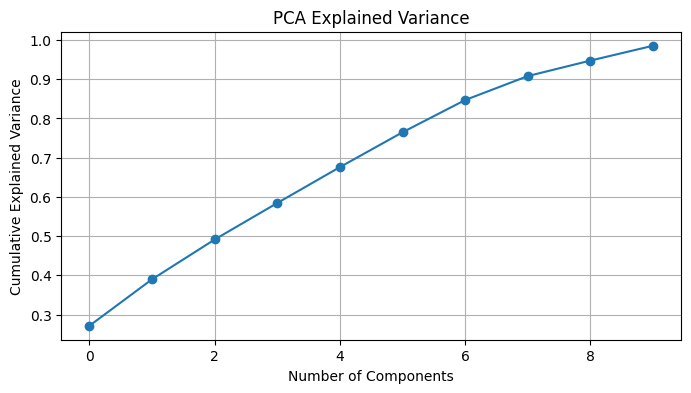

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_pca = pca.fit_transform(X_scaled)

# Optionally plot explained variance
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 4))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.grid()
plt.show()


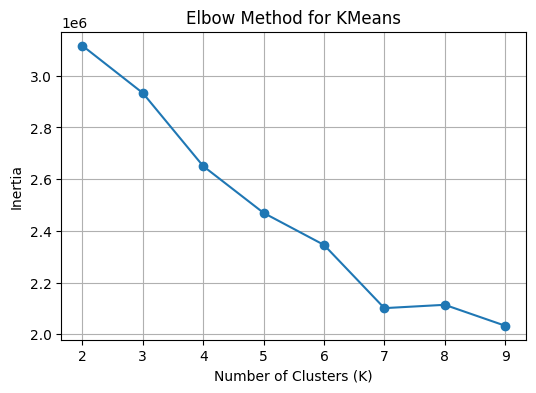

In [36]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Use elbow method to choose K
inertias = []
K_range = range(2, 10)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_pca)
    inertias.append(km.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker='o')
plt.title('Elbow Method for KMeans')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid()
plt.show()


In [41]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(X_pca)

print("KMeans Silhouette Score:", silhouette_score(X_pca, kmeans_labels))
print("KMeans Davies-Bouldin Score:", davies_bouldin_score(X_pca, kmeans_labels))


KMeans Silhouette Score: 0.23551167011799765
KMeans Davies-Bouldin Score: 1.5165897968889082


In [51]:
import hdbscan

hdb = hdbscan.HDBSCAN(min_cluster_size=30)
hdb_labels = hdb.fit_predict(X_pca)

# Evaluate HDBSCAN (ignore -1 labels which mean 'noise')
mask = hdb_labels != -1
print("HDBSCAN Silhouette Score:", silhouette_score(X_pca[mask], hdb_labels[mask]))
print("HDBSCAN DB Score:", davies_bouldin_score(X_pca[mask], hdb_labels[mask]))


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


HDBSCAN Silhouette Score: 0.3878519422063009
HDBSCAN DB Score: 0.8196787266492069


In [43]:
features['regime_kmeans'] = kmeans_labels
summary = features.groupby('regime_kmeans')[['vol_10s', 'spread', 'cum_bid_qty', 'cum_ask_qty', 'log_return']].agg(['mean', 'std'])
summary.columns = ['_'.join(col) for col in summary.columns]
summary


,vol_10s_mean,vol_10s_std,spread_mean,spread_std,cum_bid_qty_mean,cum_bid_qty_std,cum_ask_qty_mean,cum_ask_qty_std,log_return_mean,log_return_std
regime_kmeans,,,,,,,,,,
0,0.000054,0.000028,0.058860,0.019169,62.549221,70.407722,58.036493,34.055429,1.759195e-07,0.000062
1,0.000097,0.000047,0.094230,0.021508,63.732432,95.711977,58.556533,33.794608,2.029906e-07,0.000109
2,0.000079,0.000058,0.084262,0.028464,95.800289,225.266685,1078.028516,749.338234,4.921202e-06,0.000102
3,0.000229,0.000137,0.105326,0.036904,144.940950,356.159483,60.399242,59.429095,1.677308e-06,0.000258


In [44]:
regime_names = {
    0: "Volatile & Illiquid",
    1: "Trending & Liquid & Stable",
    2: "Stable & Liquid",
    3: "Mean Reverting & Illiquid"
}

features['regime_name'] = features['regime_kmeans'].map(regime_names)


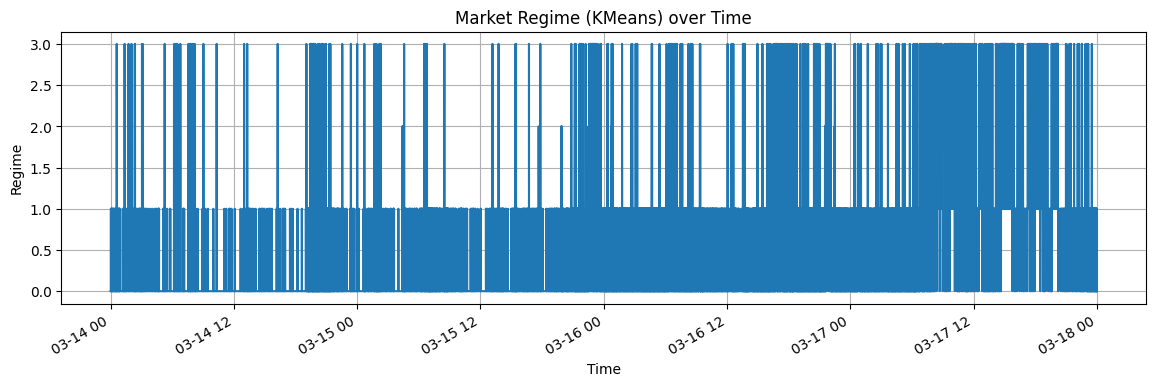

In [45]:
plt.figure(figsize=(14, 4))
features['regime_kmeans'].plot()
plt.title("Market Regime (KMeans) over Time")
plt.xlabel("Time")
plt.ylabel("Regime")
plt.grid()
plt.show()


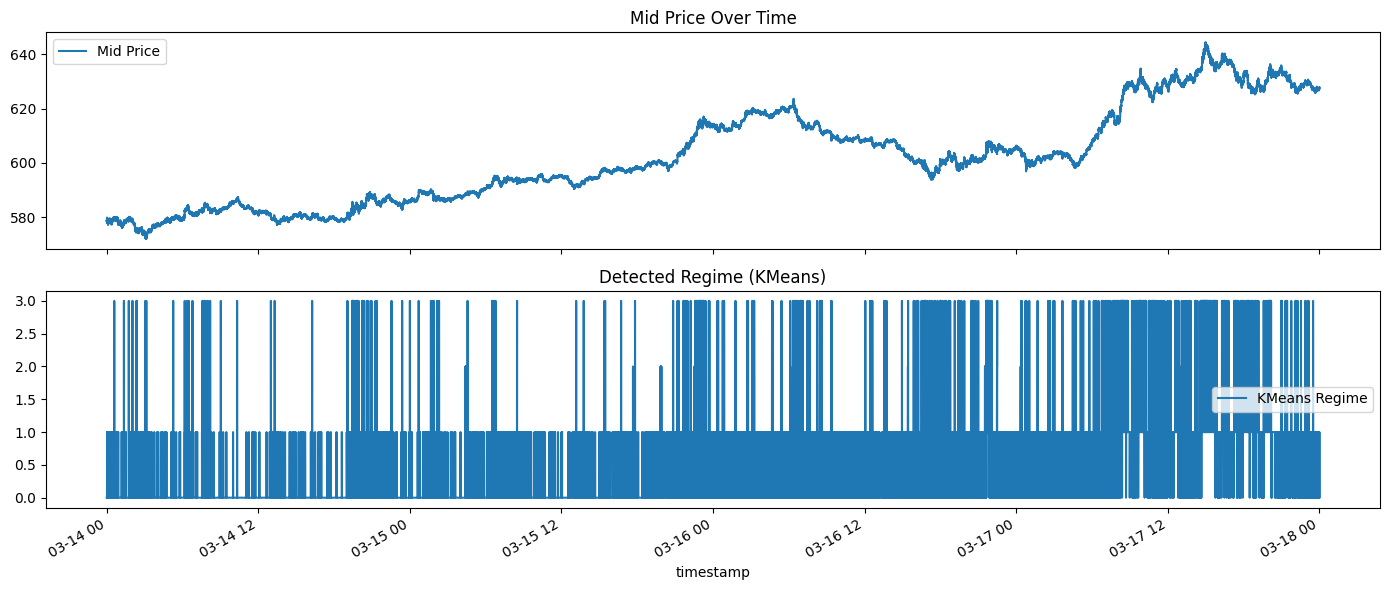

In [48]:
fig, axs = plt.subplots(2, 1, figsize=(14, 6), sharex=True)

features['mid_price'].plot(ax=axs[0], label='Mid Price')
axs[0].set_title("Mid Price Over Time")
axs[0].legend()

features['regime_kmeans'].plot(ax=axs[1], label='KMeans Regime')
axs[1].set_title("Detected Regime (KMeans)")
axs[1].legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


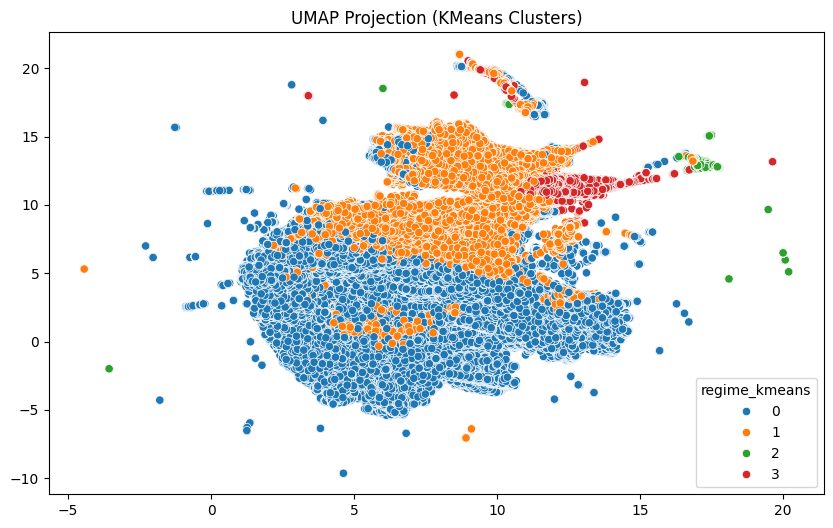

In [49]:
import umap.umap_ as umap
import seaborn as sns

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(X_pca)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=features['regime_kmeans'], palette='tab10')
plt.title('UMAP Projection (KMeans Clusters)')
plt.show()


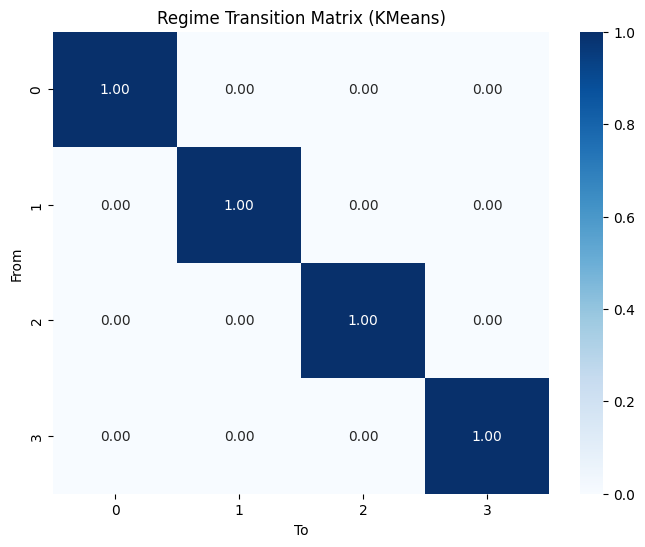

In [50]:
def compute_transition_matrix(labels):
    return pd.crosstab(
        pd.Series(labels[:-1], name='From'),
        pd.Series(labels[1:], name='To'),
        normalize='index'
    )

transition_matrix = compute_transition_matrix(features['regime_kmeans'])

plt.figure(figsize=(8, 6))
sns.heatmap(transition_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title("Regime Transition Matrix (KMeans)")
plt.show()
